In [33]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.keras.__version__)

1.14.0
2.2.4-tf


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

In [35]:
train_imgs.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

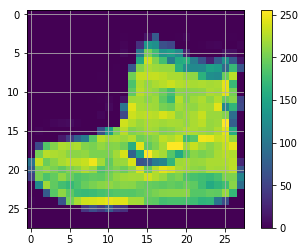

In [37]:
plt.figure()
plt.imshow(train_imgs[0])
plt.colorbar()
plt.grid()
plt.show()

### 数据预处理     
像素值落在0到255的范围内，归一化处理

In [0]:
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

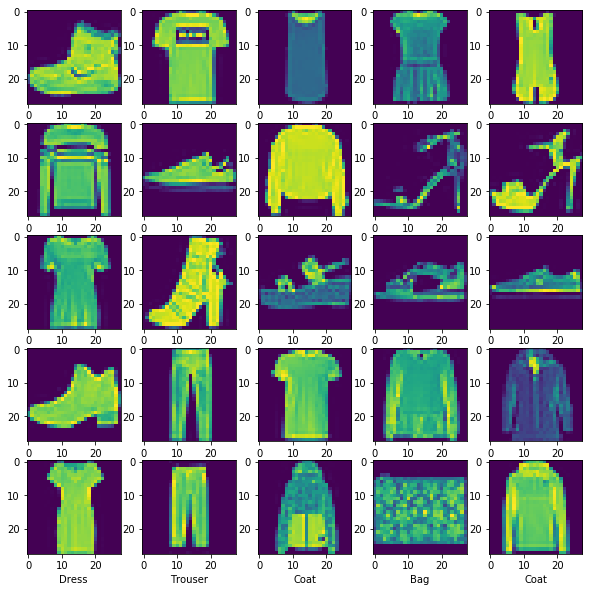

In [43]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks()
    plt.yticks()
    plt.imshow(train_imgs[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()
    

In [46]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_imgs, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4834 - acc: 0.8266
Epoch 2/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3611 - acc: 0.8673
Epoch 3/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3259 - acc: 0.8786
Epoch 4/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3020 - acc: 0.8882
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2871 - acc: 0.8919
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2702 - acc: 0.9008
Epoch 7/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2593 - acc: 0.9028
Epoch 8/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2487 - acc: 0.9068
Epoch 9/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2381 - acc: 0.9098
Epoch 10/10
60000/60000 [==============================] - 4s 74us/sample - loss: 

In [48]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print(test_loss, test_acc)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.3380 - acc: 0.8853
0.33803936640024185 0.8853
